<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 3 - Grafos </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
<center><p><h2> ¡¡IMPORTANTE!! </h2></p> </center> 

<p>
Para la realización de esta práctica tendréis que utilizar la clase de grafos NetworkX y <b>NO</b> la clase `Graph` que implementasteis en la Práctica 0. Hay casos muy concretos que no contemplan los tests y podría hacer que vuestros algoritmos no funcionen correctamente. NetworkX tiene una interfaz muy similar a la librería <i>Graph</i> que implementasteis la semana pasada. Para más información podéis consultar la documentación de la librería <a href="https://networkx.github.io/documentation/latest/reference/introduction.html">aquí.</a>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>0 - Detección de ciclos</p></h2>
  <p>
  En este ejercicio deberéis implementar un algoritmo capaz de detectar si un grafo cualquiera contiene ciclos.
</p>
 
    

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li><b>G</b>: Este es el grafo que utilizaremos para buscar ciclos. Debe de ser un objeto de tipo `nx.Graph`.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li><b>TF</b>: booleano indicando la presencia (True) o ausencia (False) de ciclos.</li>
<ul>

</p>
</div>


In [1]:
def cycle_recursive(G, at, visited, parent=-1):
    """
    Funcion recursiva que a partir de un nodo at
    recorre todas las combinaciones posibles de
    aristas. Si llega a un nodo que es el mismo
    que el inicial, encuentra un ciclo. Retorna
    un booleano para indicar si existe o no ese 
    ciclo empezando por el nodo at.

    :param G: Grafo de Networkx
    :param at: Nodo de origen del camino
    :param visited: Lista de nodos visitados
    :param parent: Nodo anterior al nodo 'at'
    :return: Diccionario con 'path', 'expanded' y 'distance'
    """
    # Node 'at' visited
    visited[at] = True

    # Check neighbors of node 'at'
    for to in G.neighbors(at):
        # Check if node 'to' has been visited
        if not visited[to]:
            # Recursively search for node 'to'
            if cycle_recursive(G, to, visited, at):
                return True
            elif parent != at:
                return True
    return False

def cycles(G):
    """
    Retorna un booleano referiendose si un grafo G
    contiene o no un ciclo en su estructura.

    :param G: Grafo de Networkx
    :return: Booleano
    """
    # Visited array
    visited = [False] * (len(G.nodes())+1)
    # List comprehension for every node of 'G'
    cycle = [cycle_recursive(G, at, visited) for at in G.nodes() if not visited[at]]
    
    # Check if there is any true on 'cycle'
    return True in cycle

In [1]:
# TEST
from utils import random_graph, draw
import networkx as nx

# GENERATE RANDOM GRAPH
G = random_graph()
nx.draw_circular(G, with_labels=True)
cycles(G)

ModuleNotFoundError: No module named 'utils'

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Circuito Euleriano</p></h2>
  <p>
  Se define como circuito euleriano aquel que pasa por todas las aristas de un grafo una única vez y que acaba en el mismo lugar en el que empieza. El problema de los caminos eulerianos fué la base de toda la teoría de grafos y fué postulado por Lehonard Euler en el famoso problema de <b>los siete puentes de Königsberg</b>. En este problema Euler se preguntaba si podía acabar en el mismo sitio tras cruzar todos los puentes una sola vez.
  </p>
  <img src="img/konigsberg.jpg"></img>
  <p>
    En este ejercicio se os propone implementar un algoritmo que, dado un grafo <i>G</i> encuentre un camino euleriano.
  </p>
  
  <h3> Este ejercicio deberéis entregarlo!</h3>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding:auto">
<center><p><h3> Código </h3></p> </center> 

<h3>INPUT</h3>
<ul>
<li><b>G</b>: Objeto de tipo grafo (<i>nx.Graph</i>) sobre el cual queremos encontrar el circuito Euleriano.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
    <li><b>nodelist</b>: Una lista de nodos ordenados que formarían el circuito.</li>
</ul>

<b>NOTA:</b> no siempre será posible encontrar un circuito euleriano. Vuestro algoritmo deberá ser capaz de detectar cuando NO es posible. En tal caso, deberá avisar al usuario (<i>print</i>) y no retornará ningún valor.
    
</div>


In [3]:
def count_node_degrees(G):
    """
    Retorna un diccionario con pareja key y value como
    nodo y su grado, respectivamente.

    :param G: Grafo de Networkx
    :return: Diccionario tipo {node: degree(node)}
    """
    return {node: G.degree(node) for node in G.nodes()}

def possible_euler_circuit(count):
    """
    Retorna un booleano que indica si los grados de todos
    los nodos son pares y en conseqüencia existe un
    possible circuito de euler.

    :param count: Diccionario tipo {node: degree(node)}
    :return: Booleano si es possible un circuito euleriano
    """
    return all([not a%2 for a in count.values()]) and len(count.keys()) > 1

def possible_euler_path(count):
    """
    Retorna un booleano que indica si existen estrictamente
    dos nodos con grado impar y en conseqüencia existe un
    possible camino de euler.

    :param count: Diccionario tipo {node: degree(node)}
    :return: Booleano si es possible un camino euleriano
    """
    return sum([a%2 for a in count.values()]) == 2

def dfs(G, at, count, visited):
    """
    Algorismo DFS recursivo que busca el possible ciclo y
    lo guarda en la variable global 'path'. Usa el valor 
    del grado de cada nodo para saber cuantas veces debe
    pasar por ese nodo y usa la técnica de backtraking
    cuando llega a un nodo sin más aristas para visitar. 

    :param G: Grafo de Networkx
    :param at: Nodo de origen
    :param count: Diccionario tipo {node: degree(node)}
    :param visited: Lista de aristas visitadas
    :return: Void
    """
    # Global variable
    global path
    # While count of edges at node 'at' is not 0
    while count[at]: 
        count[at] -= 1
        # Take next edge
        next_edge = list(G.edges(at))[count[at]]

        # Check if next edge has not been visited
        if set(next_edge) not in visited: 
            visited.append(set(next_edge))
            # Recursively search from next node of next edge
            dfs(G, next_edge[1], count, visited)

    # Add node 'at' to first position of 'path'
    path = [at] + path

def start_at(count):
    """
    Retorna el nodo par empezar el camino euleriano.

    :param count: Diccionario tipo {node: degree(node)}
    :return: Nodo origen del camino euleriano
    """
    # Filter out even degree nodes
    count_odd = dict(filter(lambda n: n[1]%2, count.items()))
    
    # Take the node with min odd degree value
    return min(count_odd, key=count_odd.get)

def euler(G): 
    """
    Retorna un possible circuito o camino de euler.
    Si no existe tal circuito o camino, se le indica
    usuario. 

    :param G: Grafo Networkx
    :return: Lista de nodos del circuito o camino euleriano
    """
    # Global variable
    global path
    path = []
    visited = []
    at = 0

    # Count degrees of each node
    count = count_node_degrees(G)

    # Check if exists possible euler circuit
    if possible_euler_circuit(count):
        print("This graph contains an euler circuit")

    # Check if exists possible euler path
    elif possible_euler_path(count):
        print("This graph contains an euler path")

        # Search for starting node
        at = start_at(count)
    else:
        print("This graph does not contains an euler circuit nor an euler path!")
        return None
    
    # Start DFS from node 'at'
    dfs(G, at, count, visited)

    return path

This graph contains an euler circuit
Path:  [0, 6, 5, 4, 6, 3, 5, 2, 6, 1, 5, 0, 4, 3, 2, 4, 1, 3, 0, 2, 1, 0]


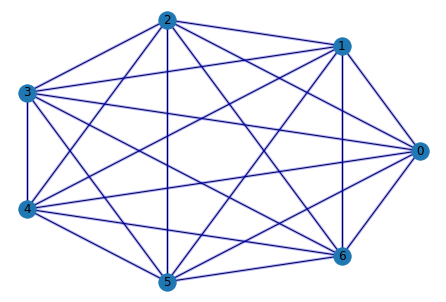

In [4]:
"""
Pruevas para verificar el algoritmo y dibujar los grafos
"""
G = random_graph()
result = euler(G)
if result:
    print("Path: ", result)
    edge_list = tuple(zip(result, result[1:]))
    nx.draw(G, nx.circular_layout(G), alpha=1, with_labels=True)
    nx.draw_networkx_edges(G, nx.circular_layout(G), alpha=0.3, edgelist=edge_list, edge_color='blue',width=3, arrows=True)

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
¿Qué condiciones se deben de cumplir para que un grafo cualquiera contenga un circuito euleriano? Demuéstralo.
</strong></p>
</div>

Las condiciones necesarias que se deben cumplir para que un grafo no dirigido contenga un circuito euleriano bastan con que los grados de todos los nodos sean pares.

Para demostrarlo nos basta con ver en el caso simple de un grafo en forma de triangulo. Elegimos un nodo origen para crear nuestro circuito. Añadimos otra arista en el nodo origen para tener grado impar, para poder volver al nodo de origen; o bién creamos otra arista para volver a él, o bién creamos otra arista hacia uno de los dos nodos anteriores y por fuerza creamos otra arista para llegar al nodo origen; en ambos casos acabamos con un grado par en todos los nodos. 

En el caso para caminos eulerianos basta con que existan estrictamente dos nodos con grado impar ya que así éstos serán los nodos de origen y destino.

<div class="alert alert-warning">
<h1>Extra</h1>
<p><strong>
Además de circuitos Eulerianos, definimos caminos Eulerianos aquellos que recorren todas las aristas de un grafo sin repetirlas, pero no termina en el mismo nodo que empieza. Modifica el algoritmo anterior para que sea capaz de detectar si el grafo contiene un ciclo o un camino Euleriano, y devuelva la lista de nodos ordenados que componen dicho ciclo o camino. Tened en cuenta que son casos excluyentes.
</strong></p>
    
<h3>Esta pregunta es opcional pero se reflejará positivamente en la nota!</h3>

</div>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
Es <b>imperativo <font size=3.5 color="#FF0000">☠☠☠ respetar las cabeceras de las funciones y estructura del return ☠☠☠</font></b> que se indiquen en el enunciado. Pese a que leemos y corregimos vuestros códigos en detalle, empleamos correctores automáticos para guiar y agilizar el proceso. De esta manera, si se pide que la función tenga la siguiente estructura:

<code>def funcion_ejercicio(lista1, indice1):
    ... # implementación de la solución
    return elemento_resultado </code>
    
En el notebook deberá existir una y solo una función con el nombre <i>funcion_ejercicio</i> que reciba exactamente los parámetros indicados y devuelva las variables en el formato y con el tipo que se requiera en el eunciado. En todos los enunciados se explicitará qué tipo de datos han de pasarse a las funciones y devolverse. <b> La no adherencia al formato de las funciones <font size=3.5 color="#FF0000">☠☠☠ conllevará a una puntuación nula sobre ese ejercicio. ☠☠☠</font> </b>
</div>

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
La entrega se podrá realizar en el campus virtual hasta el día <b>1 de Noviembre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar únicamente este notebook con el nombre:
</p>
<p>
    <code>[grupo]_[apellido]_[nombre]_Grafos_3.ipynb</code>


</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico Estándar</i> que asiste al <i>grupo Z</i> de clases presenciales*, el nombre del archivo debería ser:
</p>
<p>
<code>Z_Generico_Nombre_Grafos_3.ipynb</code>
    <br>
Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_Grafos_3.zip</li>
    
<li>ZX_Generico_Nombre_Grafos_3.ipynb</li>

<li>Lab2_Generico_Nombre_Grafos_3.rar</li>

<li>Grafos_3.ipynb</li>
<li> ... literalmente cualquier otra cosa. </li>
</ul>
</p>
<p>


Es fundamental que el código esté bién comentado.
<p>
<b> <font size=3.5 color="#FF0000">☠☠☠ No adherirse al formato en el nombre del archivo así como entregar otro tipo de archivo o varios archivos, conllevará a la no corrección de vuestra práctica. ☠☠☠</font></b>
</p>
</p>
*: Los posibles grupos de las clases presenciales son: A, B, C, D, F.
</div>